# Linear Regression

Here, we are going to see a first example of linear regression with one input variable. 

y(x) =  $\theta$<sub>1</sub>x + $\theta$<sub>0</sub>

## House Price Prediction based on feet<sup>2</sup> area

Let's begin by reading the data using Pandas library and then we are going to plot the data that we have available

In [19]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import os

house_dataset = os.path.join( "data/regression", "house_dataset.csv")

# read data in pandas frame
dataframe = pd.read_csv(house_dataset)

# assign x_feature and y_labels
x_feature = dataframe[['Size']]
y_labels = dataframe[['Price']]

In [20]:
# check data by printing first few rows
dataframe.head()

,Size,Price
0,2104,399900
1,1600,329900
2,2400,369000
3,1416,232000
4,3000,539900


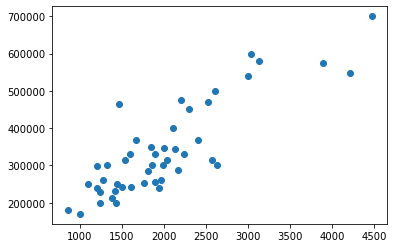

In [21]:
# Let's plot the data using a Scatter Plot 
# Scatter Plot
    # Each circle represents a house
    # xAxis position is given by the feet^2 house area
    # yAxis position is given by the house price
plt.scatter(x_feature, y_labels)
plt.show()

In [22]:
from sklearn import linear_model
# fit a linear model to the available data
body_reg = linear_model.LinearRegression()
body_reg.fit(x_feature, y_labels)

print ('theta0 = ',body_reg.intercept_)
print ('theta1 = ',body_reg.coef_)

theta0 =  [71270.49244873]
theta1 =  [[134.52528772]]


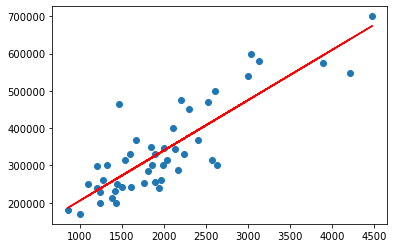

In [32]:
# predict the output based on model created
yx = body_reg.predict(x_feature)

plt.scatter(x_feature, y_labels)
plt.plot(x_feature['Size'], yx, 'red')
plt.show()

The straight line can be seen in the plot, shows how linear regression attempts to draw a straight line that will best minimize the sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation (gradient descent).

The coefficients, residual sum of squares and the coefficient of determination are also calculated.

## Polynomial Regression


Linear regression requires the relation between the dependent variable and the independent variable to be linear. What if the distribution of the data was more complex? Let's see an example with some fake data.

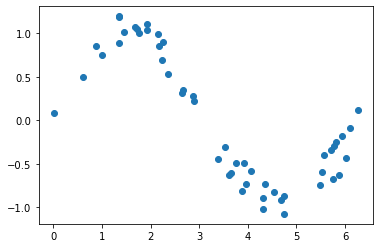

In [33]:
polynomial_dataset = os.path.join( "data/regression", "polydata.csv")

# read data in pandas frame
poly_dt = pd.read_csv(polynomial_dataset, sep = ';') # this file has attributes separated by ;
poly_dt = poly_dt.sort_values('x')
poly_dt.head()

x = poly_dt[['x']]
y = poly_dt[['y']]

plt.scatter(x, y)

So, if we used a linear regression most likely we would get a model that wouldn't fit very well the "curve"/model underlying the data available as it can be see in the following figure:

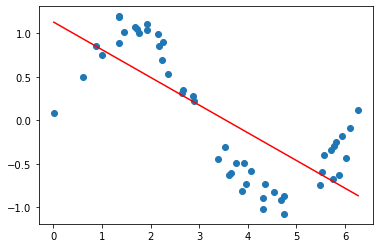

In [34]:
body_reg = linear_model.LinearRegression()
# Create a linear model
body_reg.fit(x, y)
yx = body_reg.predict(x)
# Plot the data and the model
plt.scatter(x, y)
plt.plot(x['x'], yx, 'red')


To overcome underfitting, we need to increase the complexity of the model.
To generate a higher order equation we can add powers of the original features as new features. This way, the linear model:

y(x) =  $\theta$<sub>1</sub>x + $\theta$<sub>0</sub>

can be transformed into

y(x) =  $\theta$<sub>2</sub>x<sup>2</sup> + $\theta$<sub>1</sub>x + $\theta$<sub>0</sub>

To convert the original features into their higher order terms we will use the PolynomialFeatures class provided by scikit-learn. Next, we train the model using Linear Regression.

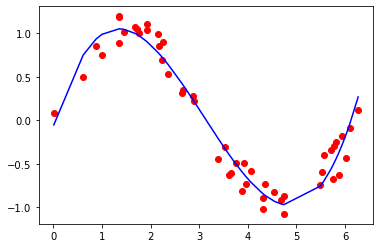

In [35]:
from sklearn.preprocessing import PolynomialFeatures

def poly_model(degree):
    polynomial_features = PolynomialFeatures(degree)

    x_poly = polynomial_features.fit_transform(x)

    model = linear_model.LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)
    plt.scatter(x, y, color='red')
    plt.plot(x['x'],y_poly_pred, color='blue')

poly_model(3)

# House Prices 

Previous examples were devised to help introduce the concepts regarding Regression. Here, we are going to take a look at a dataset available from a competition from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

Like in our first example let's try to predict the house price. 

In [36]:
houseprice_filename = os.path.join( "data/regression", "train_house_prices_kaggle.csv")

# read house_train.csv data in pandas dataframe df_train using pandas read_csv function
df = pd.read_csv(houseprice_filename, encoding='utf-8')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


So as it can be seen we have several features associated to a house. So we need to find out if there is a feature that is linearly related with Sales Price. 


In [37]:
import seaborn as sns

corrmat = df.corr()
pearson = corrmat['SalePrice']

pearson.sort_values(axis = 0, ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

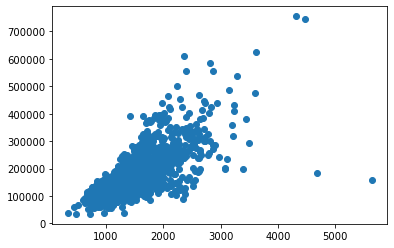

In [38]:
plt.scatter(df['GrLivArea'],df['SalePrice'])

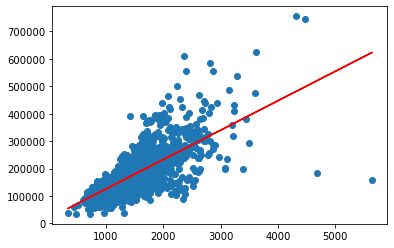

In [39]:
x = df[['GrLivArea']]
y = df[['SalePrice']]
body_reg = linear_model.LinearRegression()
body_reg.fit(x,y)
yx = body_reg.predict(x)
# Plot the data and the model
plt.scatter(x,y)
plt.plot(x['GrLivArea'], yx, 'red')


# Exercise

Here, we aim to implement a linear regression with one variable to predict profits for a food truck. The file foodtruck.csv contains the dataset for our linear regression problem. 

The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

- Find the linear model that has minimum error for the data that we have available. What are the parameters of the model identified?
- Plot the data using a scatter plot with the model identified on top of it. 


In [40]:
filename = os.path.join( "data/regression", "foodtruck.csv")
